# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

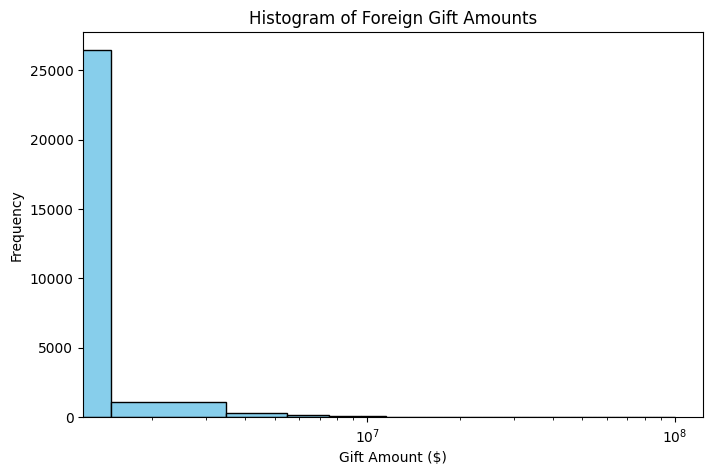

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.

df = pd.read_csv("ForeignGifts_edu.csv")


df['Foreign Gift Amount'] = pd.to_numeric(df['Foreign Gift Amount'], errors='coerce')

# 2.

plt.figure(figsize=(8, 5))
plt.hist(df['Foreign Gift Amount'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Foreign Gift Amounts')
plt.xlabel('Gift Amount ($)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()


df['Foreign Gift Amount'].describe()

#Skewed right, small number of large gifts

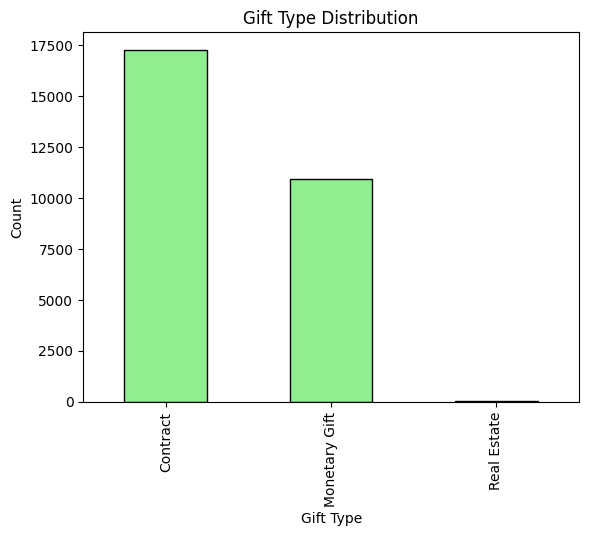

,count
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


In [3]:
# 3.

gift_type_counts = df['Gift Type'].value_counts()
gift_type_proportions = gift_type_counts / gift_type_counts.sum()


gift_type_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Gift Type Distribution')
plt.ylabel('Count')
plt.xlabel('Gift Type')
plt.show()


gift_type_proportions

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


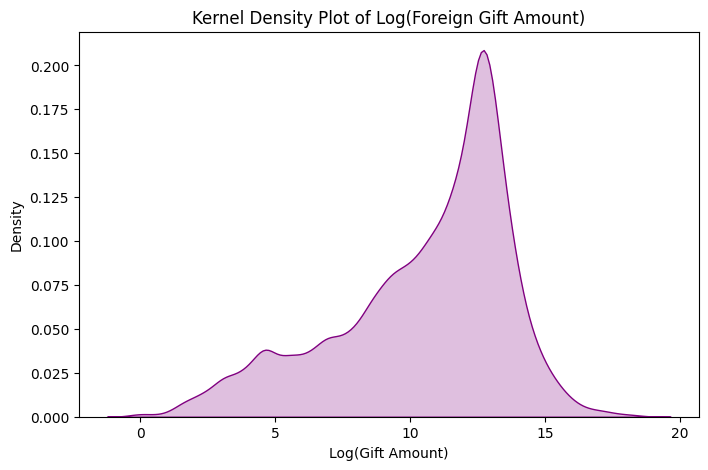

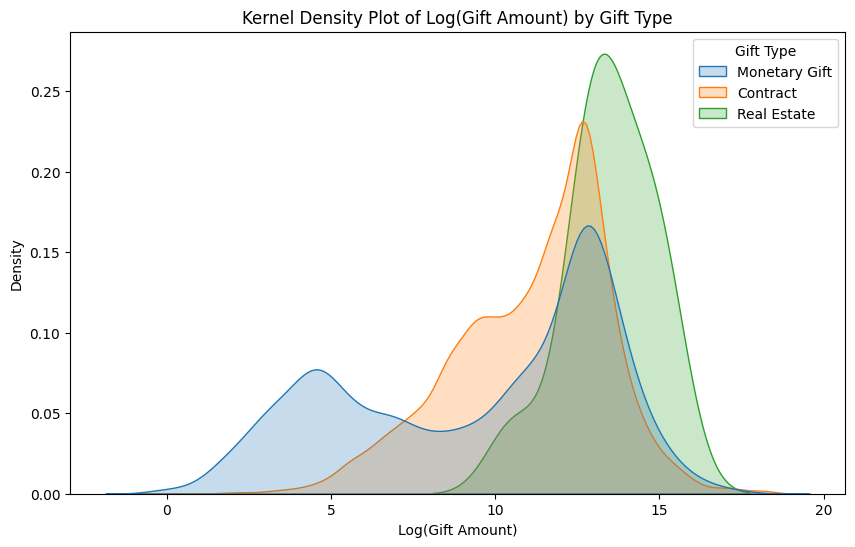

In [4]:
#4.

df['Log Gift Amount'] = np.log(df['Foreign Gift Amount'].replace(0, np.nan))


plt.figure(figsize=(8, 5))
sns.kdeplot(df['Log Gift Amount'].dropna(), fill=True, color='purple')
plt.title('Kernel Density Plot of Log(Foreign Gift Amount)')
plt.xlabel('Log(Gift Amount)')
plt.show()


plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Log Gift Amount', hue='Gift Type', fill=True, common_norm=False)
plt.title('Kernel Density Plot of Log(Gift Amount) by Gift Type')
plt.xlabel('Log(Gift Amount)')
plt.show()

# There are more cheaper monetary gifts but more expensive real estate gifts. Gift amount for all three gift types increase around the same log amount.

In [5]:
# 5.

top_countries_count = df['Country of Giftor'].value_counts().head(15)


top_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

top_countries_count, top_countries_amount

(Country of Giftor
 ENGLAND            3655
 CHINA              2461
 CANADA             2344
 JAPAN              1896
 SWITZERLAND        1676
 SAUDI ARABIA       1610
 FRANCE             1437
 GERMANY            1394
 HONG KONG          1080
 SOUTH KOREA         811
 QATAR               693
 THE NETHERLANDS     512
 KOREA               452
 INDIA               434
 TAIWAN              381
 Name: count, dtype: int64,
 Country of Giftor
 QATAR                   2706240869
 ENGLAND                 1464906771
 CHINA                   1237952112
 SAUDI ARABIA            1065205930
 BERMUDA                  899593972
 CANADA                   898160656
 HONG KONG                887402529
 JAPAN                    655954776
 SWITZERLAND              619899445
 INDIA                    539556490
 GERMANY                  442475605
 UNITED ARAB EMIRATES     431396357
 FRANCE                   405839396
 SINGAPORE                401157692
 AUSTRALIA                248409202
 Name: Foreign Gift

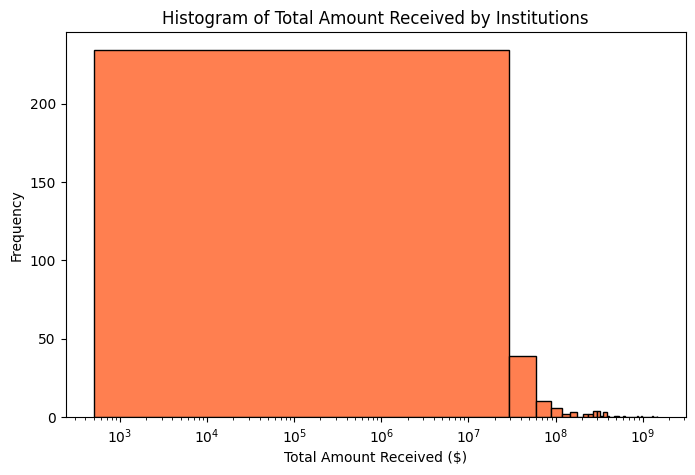

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


In [6]:
#6.
institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()


top_institutions = institution_totals.sort_values(ascending=False).head(15)


plt.figure(figsize=(8, 5))
plt.hist(institution_totals.dropna(), bins=50, color='coral', edgecolor='black')
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

top_institutions

In [7]:
#7.


giftor_totals = df.groupby('Giftor Name')['Foreign Gift Amount'].sum()


top_giftors = giftor_totals.sort_values(ascending=False).head(15)

top_giftors

# Qatar Foundation gifted the most

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [12]:
#1.
import pandas as pd

df = pd.read_csv("drilling_rigs.csv")

df.describe()
len(df.columns)
# 623 observations, 10 variables, some variables have to be typecasted.
# non-numeric entries were replaced with NaN values,
#affected columns were converted to numeric data types.
#the Month column was converted to a datetime object


10

In [13]:
#2.

df['time'] = pd.to_datetime(df['Month'], format='mixed')

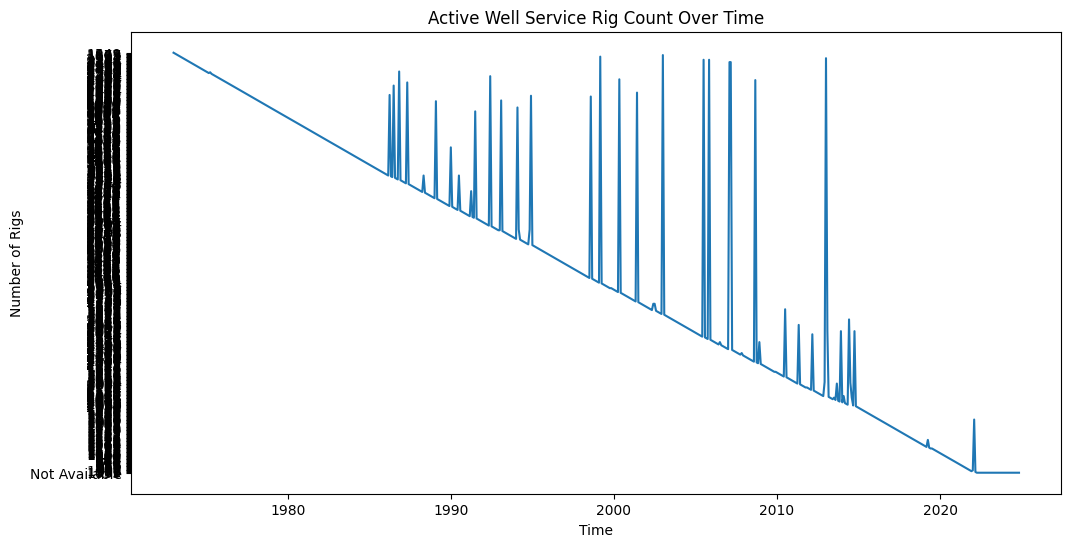

In [14]:
# 3.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='Active Well Service Rig Count (Number of Rigs)', data=df)
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.show()

# The number of oil rigs has decreased over time with a few spikes, likely to account for demand.

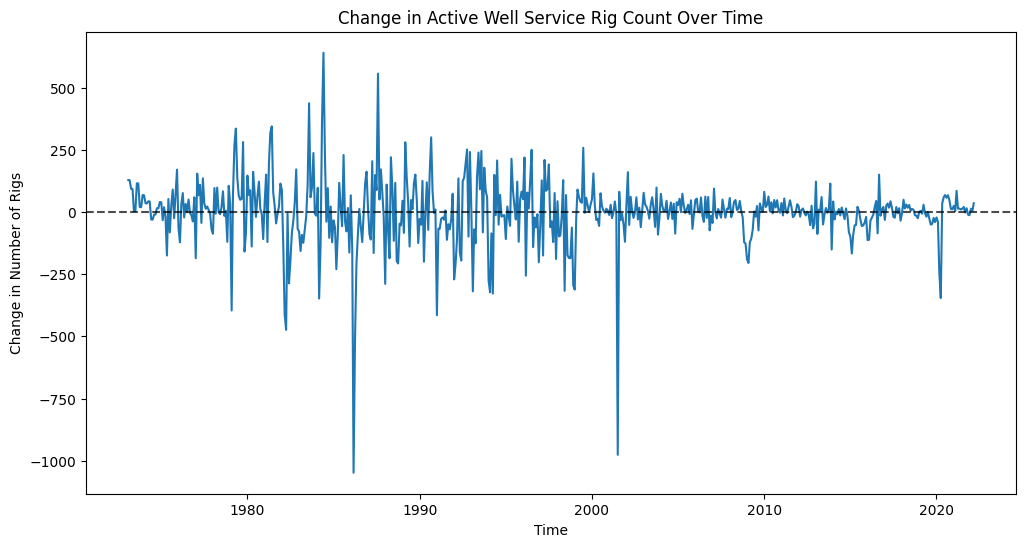

In [17]:
# 4.
df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce'
)


df['Rig Count Change'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='Rig Count Change', data=df)
plt.axhline(0, color='black', linestyle='--', alpha=0.7)  # Reference line at zero
plt.title('Change in Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs')
plt.show()


# Between the start of the graoh and 2000 the number of active oil wells fluctuated drastically over time but after 2000 the number of wells remaiuned relatively constant.

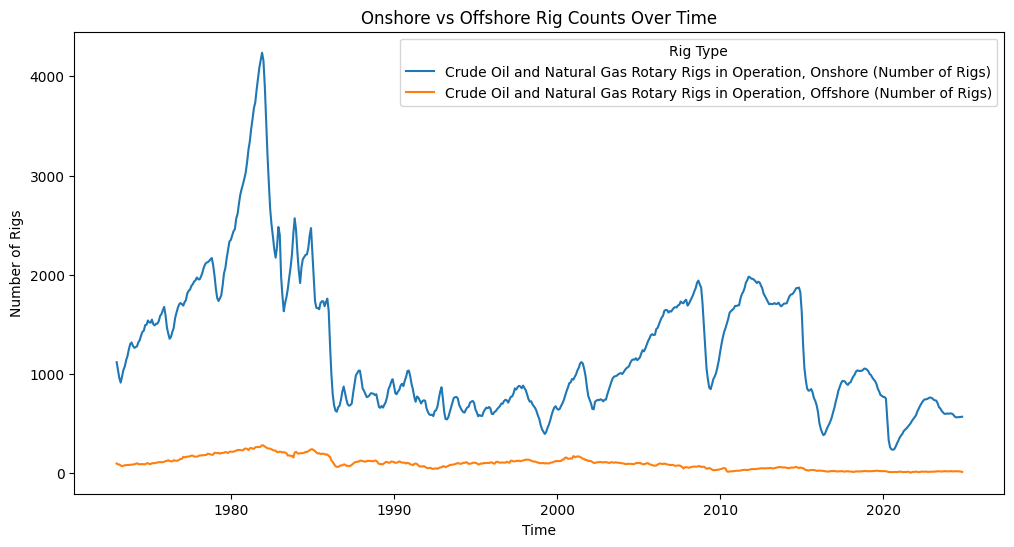

In [18]:
# 5.
df_melted = df.melt(
    id_vars=['time'],
    value_vars=[
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
        'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
    ],
    var_name='Rig Type',
    value_name='Count'
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='time', y='Count', hue='Rig Type')
plt.title('Onshore vs Offshore Rig Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.legend(title='Rig Type')
plt.show()